IBM HACK CHALLENGE 2023

Technology Track: Applied Data Science

Topic Name: Identifying Patterns and Trends in Campus Placement Data Using Machine Learning

Team Member:
Pooja Sharma
Nainisha Sharma
Akash Patil

# **Tables**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
null_values = df.isnull().sum()
null_values

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df['salary'].fillna(0,inplace = True)

In [ ]:
gender_stats = df.groupby('gender').agg({
    'status': lambda x: (x == 'Placed').mean() * 100,  # Placement percentage
    'salary': 'mean'  # Average salary
}).reset_index()
gender_stats.rename(columns={'status': 'Placement Percentage', 'salary': 'Average Salary'}, inplace=True)
gender_stats

,gender,Placement Percentage,Average Salary
0,F,63.157895,168815.789474
1,M,71.942446,215043.165468


The gender distinctions in the table above reflect the following points:
1. Males received jobs more frequently than females,
2. And they also made on average more money.

In [ ]:
boards_analysis =  df[['ssc_b','status']].groupby(['ssc_b'], as_index = False).count()
boards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['ssc_b'],as_index = False).count()
boards_analysis['Placed'] = boards_analysis1['status']
boards_analysis['Placed_Percent'] = boards_analysis['Placed']/boards_analysis['status']*100
boards_analysis.rename(columns = {'ssc_b':'SSC_Board' , 'status':'Total_Students'})
boards_analysis

,ssc_b,status,Placed,Placed_Percent
0,Central,116,78,67.241379
1,Others,99,70,70.707071


People who studied from Central SSC board got placed less compared to others.

In [ ]:
hscboards_analysis =  df[['hsc_b','status']].groupby(['hsc_b'], as_index = False).count()
hscboards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_b'],as_index = False).count()
hscboards_analysis['Placed'] = hscboards_analysis1['status']
hscboards_analysis['Placed_Percent'] = hscboards_analysis['Placed']/hscboards_analysis['status']*100
hscboards_analysis.rename(columns = {'hsc_b':'HSC_Board' , 'status':'Total_Students'})

,HSC_Board,Total_Students,Placed,Placed_Percent
0,Central,84,57,67.857143
1,Others,131,91,69.465649


People who studied from Central HSC board got placed less compared to others.

In [ ]:
ssc_hsc = pd.pivot_table(df, values='sl_no', index=['ssc_b', 'hsc_b'], columns=['status'], aggfunc='count', fill_value=0)

# Calculate total counts for each board type
total_counts = ssc_hsc.sum(axis=1)

# Calculate placement percentage
ssc_hsc['Placement Percentage'] = (ssc_hsc['Placed'] / total_counts) * 100

# Print the pivot table
print(ssc_hsc)

# Calculate and print the total number of people placed
total_placed = ssc_hsc['Placed'].sum()
total_people = df.shape[0]
print(f'Total people placed out of {total_people} total: {total_placed}')

status           Not Placed  Placed  Placement Percentage
ssc_b   hsc_b                                            
Central Central          24      53             68.831169
        Others           14      25             64.102564
Others  Central           3       4             57.142857
        Others           26      66             71.739130
Total people placed out of 215 total: 148


In [ ]:
hscsubject_analysis =  df[['hsc_s','status']].groupby(['hsc_s'], as_index = False).count()
hscsubject_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_s'],as_index = False).count()
hscsubject_analysis['Placed'] = hscsubject_analysis1['status']
hscsubject_analysis['Placed_Percent'] = hscsubject_analysis['Placed']/hscsubject_analysis['status']*100
hscsubject_analysis.rename(columns = {'hsc_s':'HSC_subject' , 'status':'Total_Students'})

,HSC_subject,Total_Students,Placed,Placed_Percent
0,Arts,11,6,54.545455
1,Commerce,113,79,69.911504
2,Science,91,63,69.230769


People with Commerce and Science got placed more compared to Arts.

In [ ]:
specialisation_analysis =  df[['specialisation','status']].groupby(['specialisation'], as_index = False).count()
specialisation_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['specialisation'],as_index = False).count()
specialisation_analysis['Placed'] = specialisation_analysis1['status']
specialisation_analysis['Placed_Percent'] = specialisation_analysis['Placed']/specialisation_analysis['status']*100
specialisation_analysis.rename(columns = {'specialisation':'MBA_specialisation' , 'status':'Total_Students'})

,MBA_specialisation,Total_Students,Placed,Placed_Percent
0,Mkt&Fin,120,95,79.166667
1,Mkt&HR,95,53,55.789474


People who have experience in marketing and finance got placed more compared to people who have experience in marketing and HR.

## **Graph**

<ipython-input-12-165d7a7bc533>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_male['salary'].loc[df['salary']!=0] , ax = ax[0])
<ipython-input-12-165d7a7bc533>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_female['salary'].loc[df['salary']!=0] , ax = ax[1])


Text(0.5, 1.0, 'Female')

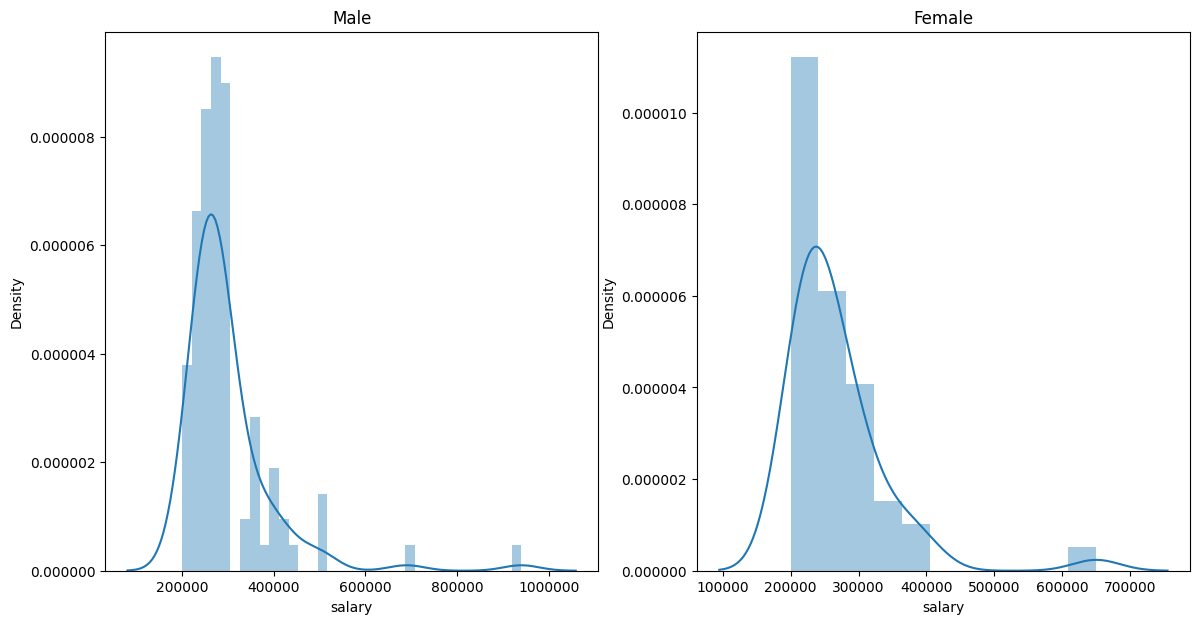

In [ ]:
fig, ax =plt.subplots(1,2 , figsize = (14,7))
df_male = df.loc[df['gender'] == 'M']
df_female = df.loc[df['gender'] == 'F']
sns.distplot(df_male['salary'].loc[df['salary']!=0] , ax = ax[0])
sns.distplot(df_female['salary'].loc[df['salary']!=0] , ax = ax[1])
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')
ax[0].set_title("Male")
ax[1].set_title("Female")

<Axes: xlabel='workex', ylabel='count'>

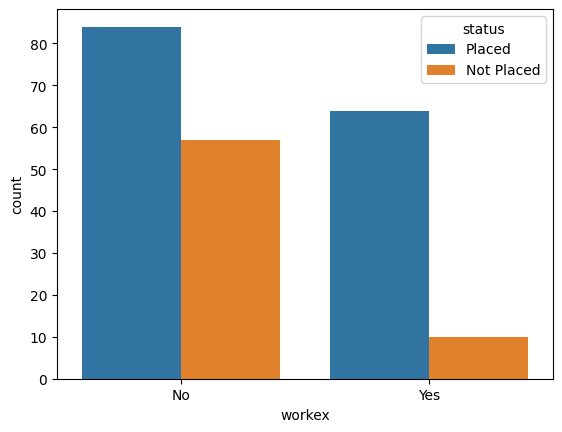

In [ ]:
sns.countplot(x = 'workex' , data =df , hue = 'status')

People who have experience have more chances to get placed than people with no experience.

<Axes: xlabel='degree_t', ylabel='count'>

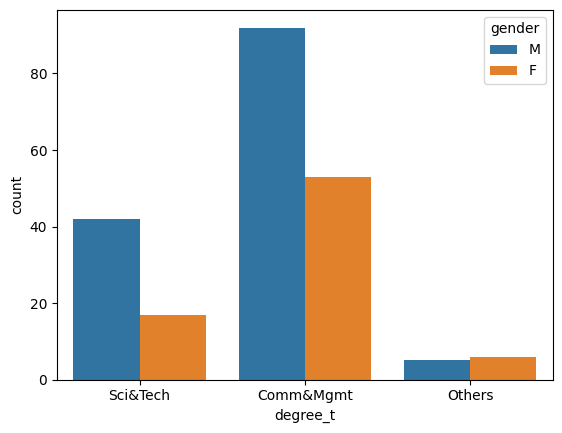

In [ ]:
sns.countplot(x = 'degree_t' , data =df , hue = 'gender')

<Axes: xlabel='specialisation', ylabel='salary'>

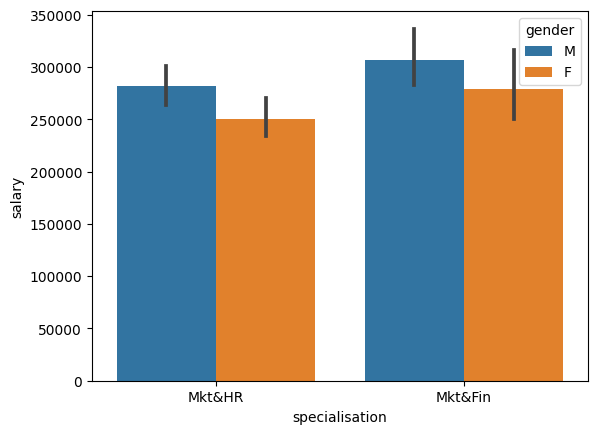

In [ ]:
sns.barplot(x = 'specialisation' , y = 'salary' , data =df.loc[df['status']== 'Placed'] , hue = 'gender')

<ipython-input-16-d41c670d8d84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


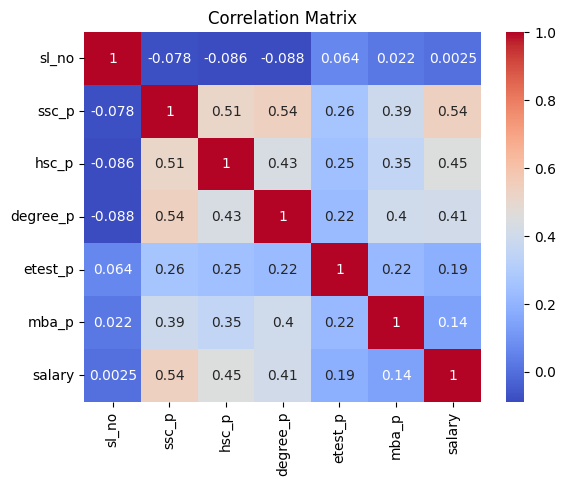

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Career Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('student_data.csv')
df.head()

,Branch,CGPA,Backlogs,Interest,Profession
0,Information Technology,6.872701,7,Web Development,Web Developer
1,Information Technology,9.753572,1,Network Engineering,Network Engineer
2,Electrical Engineering,8.659970,4,AIML,AI Engineer
3,Civil Engineering,7.993292,4,AIML,AI Engineer
4,Information Technology,5.780093,5,Web Development,Web Developer


In [ ]:
X = df[['Branch', 'CGPA', 'Backlogs', 'Interest']]
y = df['Profession']

In [ ]:
label_encoders = {}
for col in ['Branch', 'Interest']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

<ipython-input-20-102169b65437>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-20-102169b65437>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
input_features = ['Computer Science', 8.5, 2, 'AIML']
encoded_input = [label_encoders[col].transform([input_features[i]])[0] if col in label_encoders else input_features[i] for i, col in enumerate(X.columns)]
predicted_profession = model.predict([encoded_input])[0]
print(f"Predicted Profession: {predicted_profession}")

Predicted Profession: AI Engineer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
input_features = ['Information Technology', 8.5, 2, 'Web Development']
encoded_input = [label_encoders[col].transform([input_features[i]])[0] if col in label_encoders else input_features[i] for i, col in enumerate(X.columns)]
predicted_profession = model.predict([encoded_input])[0]
print(f"Predicted Profession: {predicted_profession}")

Predicted Profession: Web Developer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
